In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.utils import plot_model, to_categorical

import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

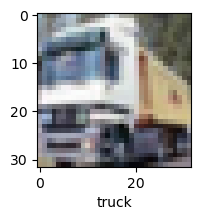

In [7]:
plot_sample(X_train, y_train, 1)

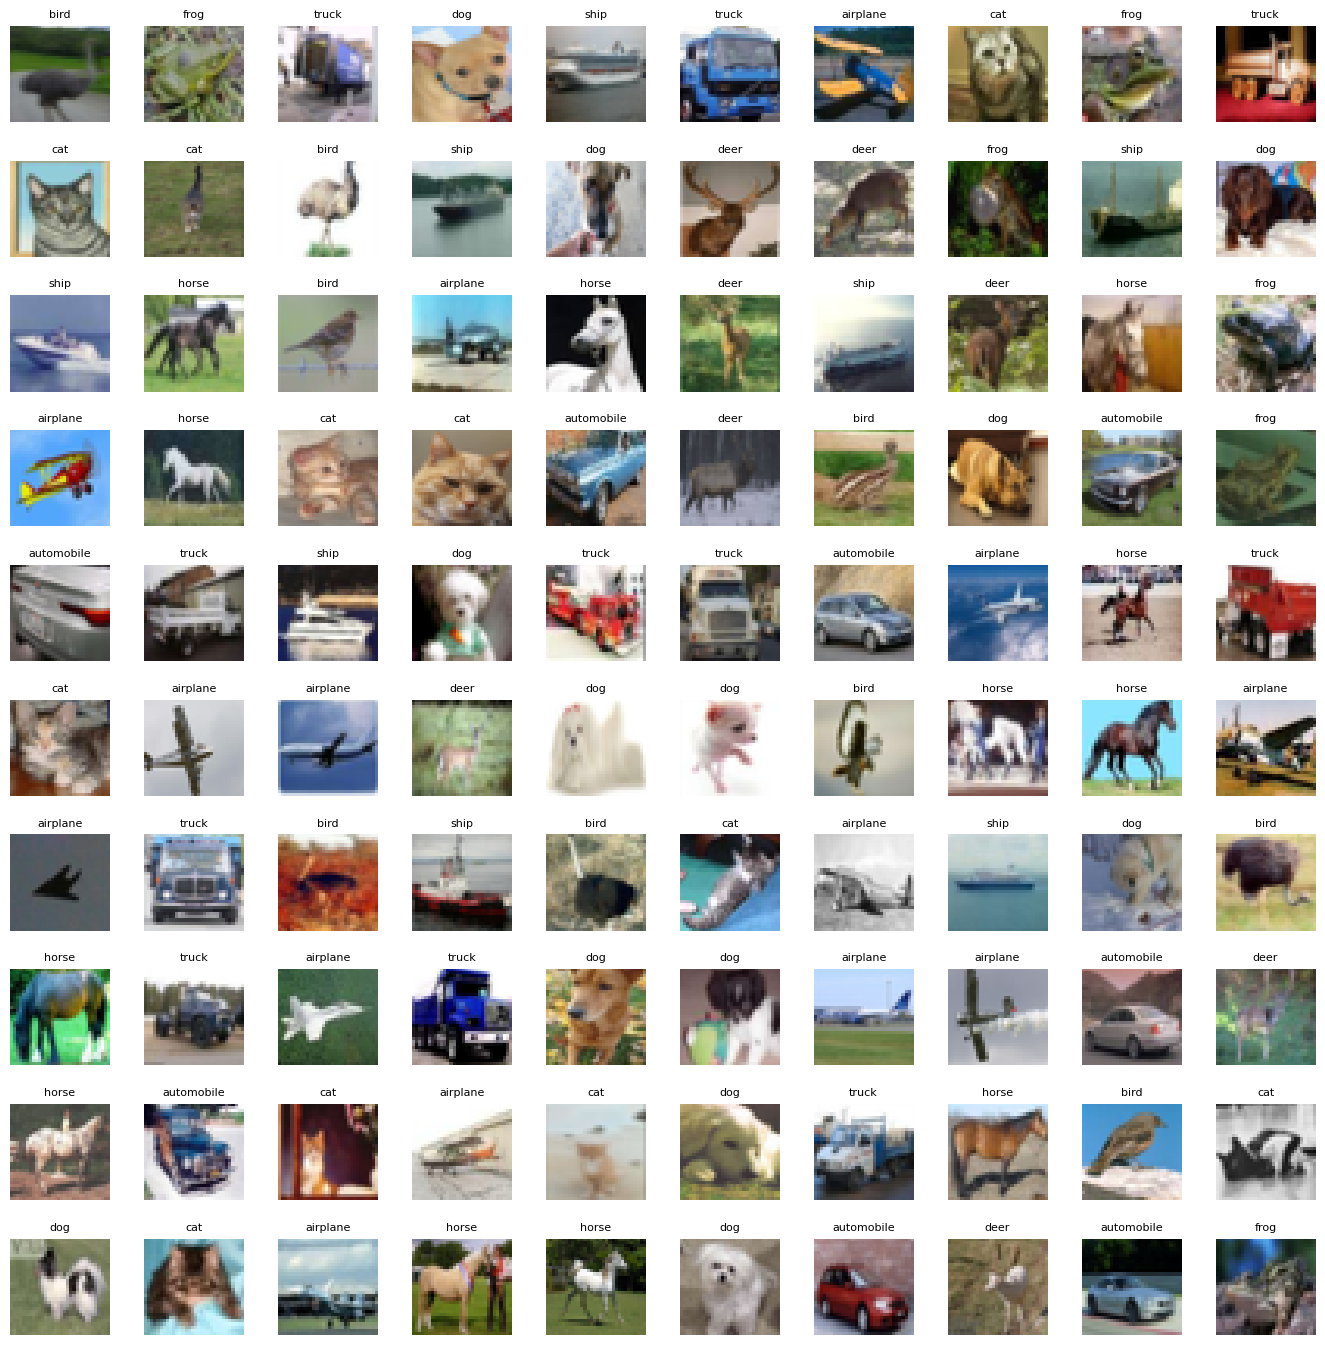

In [8]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)

In [11]:
from tensorflow.keras.layers import Conv2D
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [12]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=92, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=92, kernel_size=(3, 3) ,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(train_generator, epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
1563/1563 [==============================] - 246s 155ms/step - loss: 1.6481 - accuracy: 0.4014 - val_loss: 1.6360 - val_accuracy: 0.4437
Epoch 2/10
1563/1563 [==============================] - 219s 140ms/step - loss: 1.2333 - accuracy: 0.5646 - val_loss: 1.3452 - val_accuracy: 0.5566
Epoch 3/10
1563/1563 [==============================] - 218s 139ms/step - loss: 1.0267 - accuracy: 0.6427 - val_loss: 0.9730 - val_accuracy: 0.6636
Epoch 4/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.9060 - accuracy: 0.6895 - val_loss: 1.2254 - val_accuracy: 0.5884
Epoch 5/10
1563/1563 [==============================] - 218s 140ms/step - loss: 0.8276 - accuracy: 0.7200 - val_loss: 0.7922 - val_accuracy: 0.7325
Epoch 6/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.7679 - accuracy: 0.7386 - val_loss: 0.7048 - val_accuracy: 0.7597
Epoch 7/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.7298 - accuracy: 0.7524 - val_

In [16]:
# Score trained model.
scores = model.evaluate(X_test,y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(X_test)
Y_pred_classes = np.argmax(pred, axis=1) 

313/313 [==============================] - 9s 27ms/step - loss: 0.6218 - accuracy: 0.7912
Test loss: 0.62184077501297
Test accuracy: 0.7911999821662903
313/313 [==============================] - 8s 25ms/step


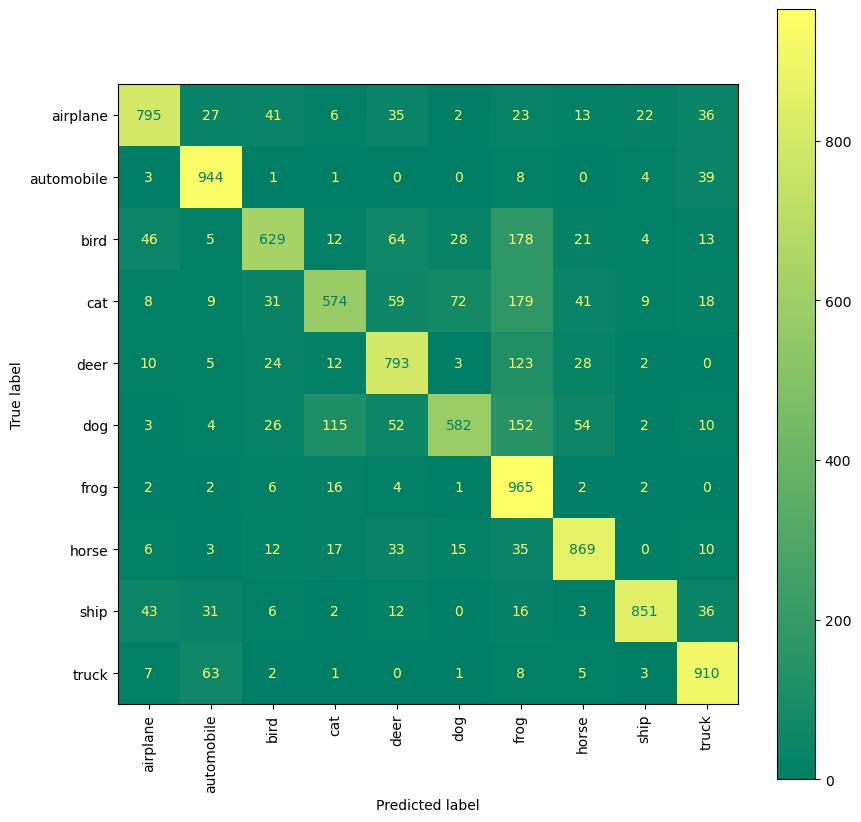

In [17]:
cm = confusion_matrix(y_test, Y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [18]:
print(classification_report(y_test, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.86      0.94      0.90      1000
           2       0.81      0.63      0.71      1000
           3       0.76      0.57      0.65      1000
           4       0.75      0.79      0.77      1000
           5       0.83      0.58      0.68      1000
           6       0.57      0.96      0.72      1000
           7       0.84      0.87      0.85      1000
           8       0.95      0.85      0.90      1000
           9       0.85      0.91      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



In [19]:
print(precision_score(y_test,Y_pred_classes,average='weighted'))
print(recall_score(y_test,Y_pred_classes,average='weighted'))
print(f1_score(y_test,Y_pred_classes,average='weighted'))
print(accuracy_score(y_test,Y_pred_classes))

0.8079561470945239
0.7912
0.7892733028828806
0.7912


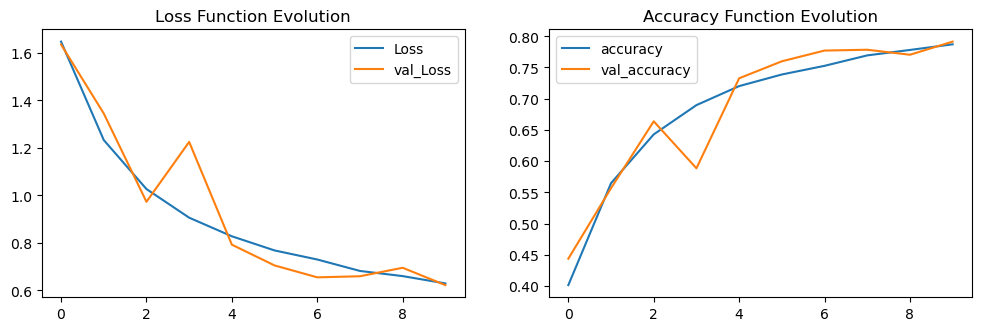

In [20]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()


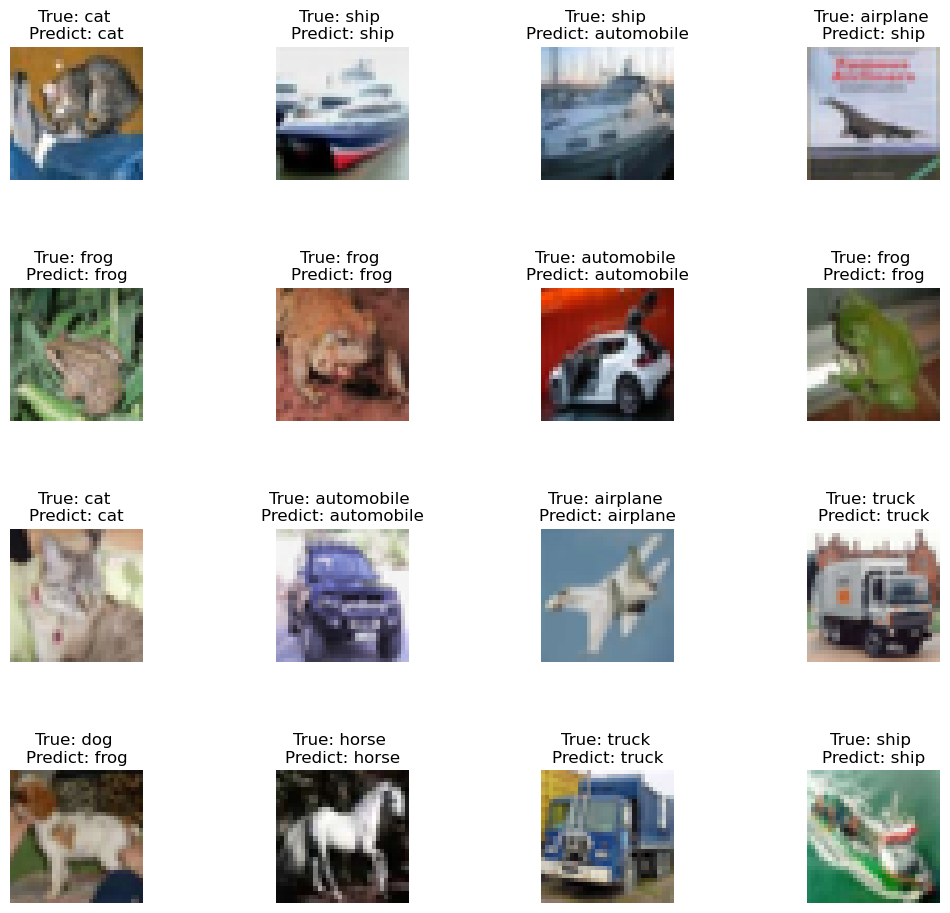

In [21]:

R = 4
C = 4
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test[i]], classes[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [22]:
import os
from tensorflow.keras.preprocessing import image

In [23]:
# dir_path = r'C:\Users\ASUS\Desktop\project_mtech\model\CHAPTER 1\test'
# for i in os.listdir(dir_path ):
#     img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
#     plt.imshow(img)
#     plt.show()

In [27]:
#test_image.shape

(1, 32, 32, 3)

1/1 [==============================] - 0s 31ms/step


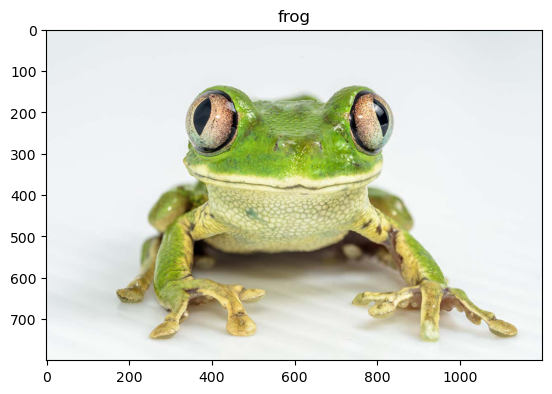

In [25]:


test_image = image.load_img("test/4.jpg")
plt.imshow(test_image)

test_image_resize =  test_image.resize((32, 32))
test_image = image.img_to_array(test_image_resize)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

pred = np.argmax(result)
plt.title(classes[pred])
plt.show()

1/1 [==============================] - 0s 11ms/step


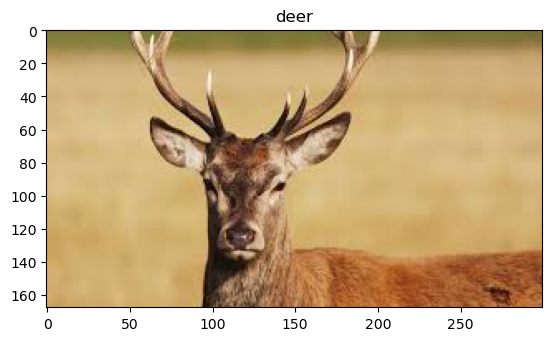

1/1 [==============================] - 0s 26ms/step


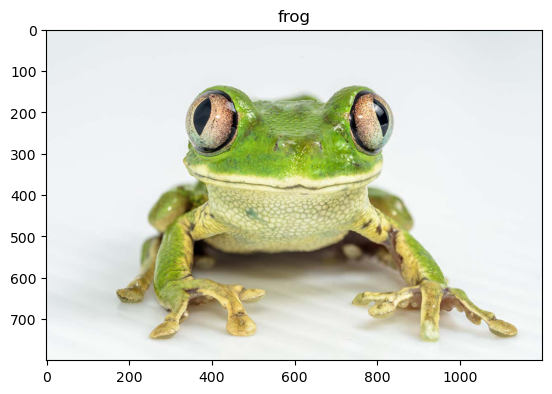

1/1 [==============================] - 0s 32ms/step


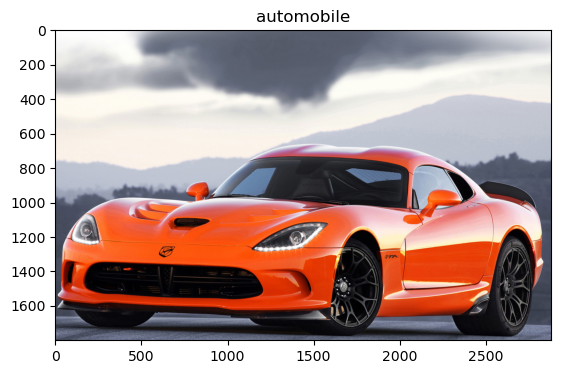

1/1 [==============================] - 0s 16ms/step


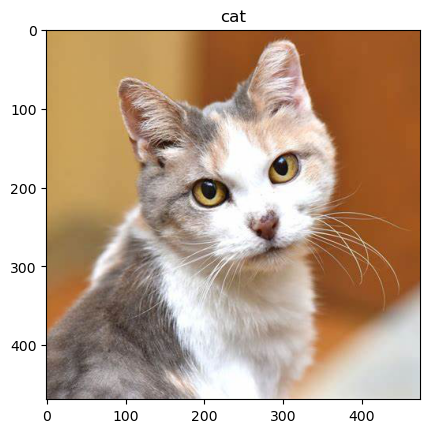

1/1 [==============================] - 0s 31ms/step


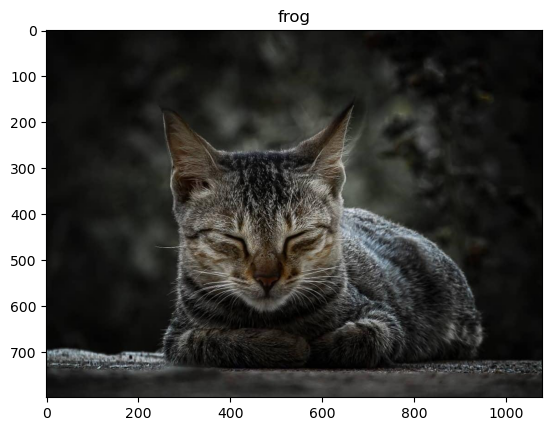

1/1 [==============================] - 0s 18ms/step


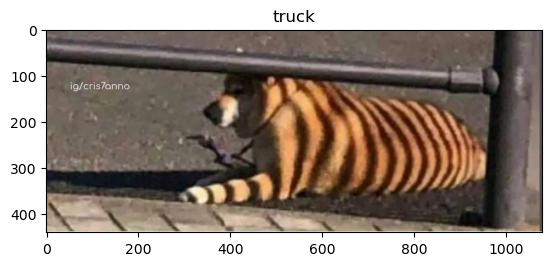

1/1 [==============================] - 0s 16ms/step


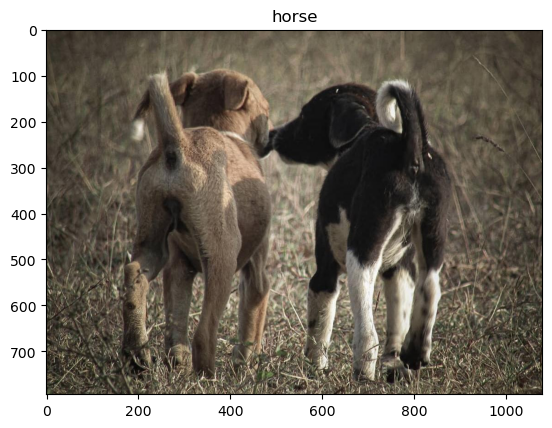

1/1 [==============================] - 0s 17ms/step


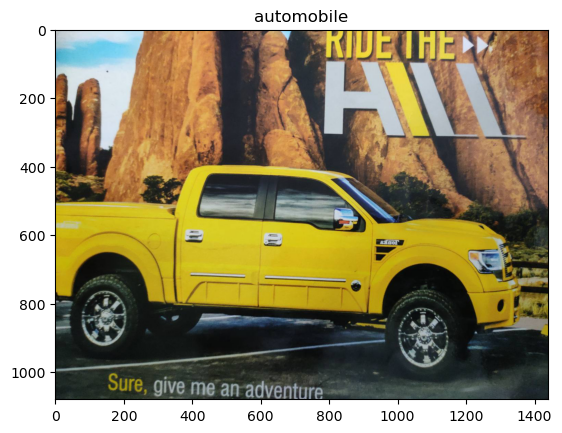

In [26]:
dir_path = 'test/'

for i in os.listdir(dir_path):
    
    test_image = image.load_img(dir_path+'/'+i)
    plt.imshow(test_image)
    
    test_image = test_image.resize((32,32))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result)
    plt.title(classes[pred])
    plt.show()